In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.animation as animation
import wdata
%matplotlib nbagg

def animate(images):
    """ need to keep a reference to returned object for the animation to work!"""
    fig = plt.figure()
    ims = []
    for n,i in enumerate(images):
        ims.append([plt.imshow(i, Animated=True, cmap='gray', origin='lower')])
    return animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                    repeat_delay=1000)

1108


<IPython.core.display.Javascript object>


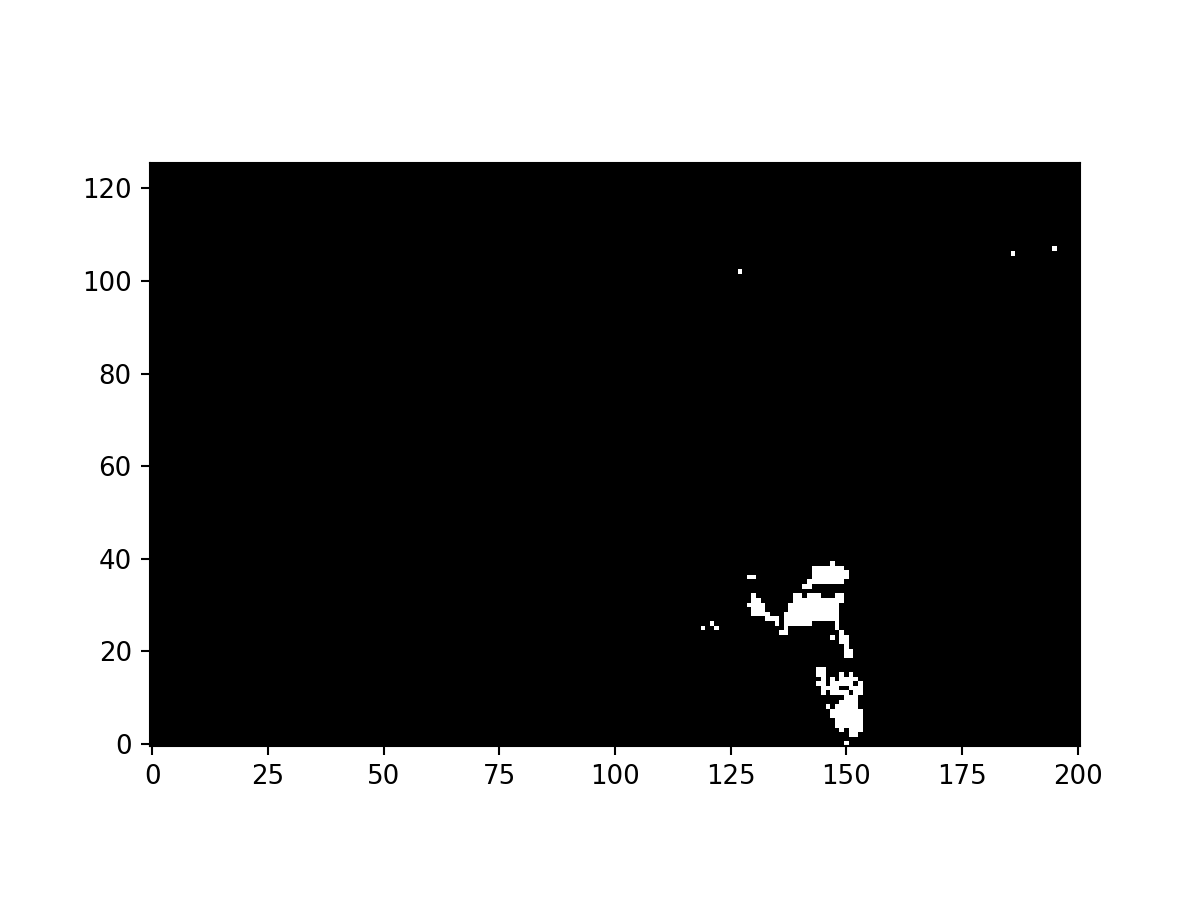

In [104]:
print len((getYear(2017)))
ani = animate(getYear(2017))